# NeuroMet

Instructions:
* this notebook cannot be used for two different analysis at the same time. If you are unsure if someone is using it click on File / Make a copy and work with the copy.
* to run a cell press Umschalt (Shift) + Enter
* to correctly run the workflow _EVERY_ cell has to be ran
* When you run a cell, there is at first an [*] on the left, then a number (maybe an updated number) when the cell ran.
* normally the only thing to adjust in the settings is 1.6 Subject

## 0. External Modules

red warnings are normal in next cell

In [1]:
import nipype.interfaces.freesurfer
from nipype.interfaces.freesurfer import Info

Info.version()  


200609-18:01:45,188 nipype.utils WARNING:
	 Could not check for version updates: 
Connection to server could not be made


'freesurfer-linux-centos7_x86_64-7.1.0-20200511-813297b'

In [2]:
! echo $FREESURFER_HOME

/opt/freesurfer_7


In [3]:
import importlib
import workflows
importlib.reload(workflows)
from workflows.NeuroMet_dev_fs7 import NeuroMet as NeuroMet

Just some external modules required to run correctly the notebook - nothing to edit - just press **shift + enter**

In [4]:
import os
import glob
from IPython.display import Image
%matplotlib inline

## 1. Settings

### 1.1 Directories and Folders

In [41]:
## Paths
raw_data_dir = '/media/drive_s/AG/AG-Floeel-Imaging/00-Rohdaten/02_niftis/NeuroMet_TheresaKoebe/02_NeuroMet'
base_dir = '/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET'
temp_dir = '/home/WorkFlowTemp/NeuroMet'

#Working directory
w_dir = os.path.join(base_dir, 'Structural_analysis_fs7')

#Excel file with masks
mask_file = '/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/List_UNI_DEN_Mask.xlsx'

In [42]:
import pandas as pd
df = pd.read_excel(mask_file, header =None, names=['ids', 'masks', 'notes'])
df = df[df.masks.notnull()]

In [43]:
subs = [i[-3:] for i in list(df.ids.values)]
subs

['001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '010',
 '011',
 '012',
 '013',
 '014',
 '015',
 '016',
 '017',
 '018',
 '019',
 '020',
 '021',
 '022',
 '023',
 '024',
 '025',
 '026',
 '027',
 '028',
 '029',
 '030',
 '031',
 '032',
 '033',
 '036',
 '038',
 '039',
 '041',
 '042',
 '047',
 '051',
 '052',
 '054',
 '058',
 '059',
 '060',
 '061',
 '062',
 '066']

### 1.2 Matlab

The path where SPM is and the command to call matlab. *Everything should be fine as is*

In [44]:
spm_path='/opt/spm12'
matlab_command = "matlab -nodesktop -nosplash"

### 1.3 FSL

Set format for FSL output files, i.e. NIFTI_GZ, NIFTI

References: https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/FslEnvironmentVariables

In [45]:
fsl_file_format = 'NIFTI_GZ'

### 1.4 QDec

In [46]:
qdec_subfolder = ''

### 1.5 Others

* **cores** : 6, if you don't have to run/work on something else at the same time
* **overwrite**: If the "_copy from raw data_" step should overwrite the copied files
* **omp_nthreads**: cores/2 is a good choice

In [47]:
cores = 6
overwrite = False
omp_nthreads = 3

### 1.5 Subjects

**subject_list**:
* to analyze all subjects cut&paste below: `subject_list = [ x.split('/')[-1][8:11] for x in os.listdir(w_dir) if x.startswith('NeuroMet')]`
* to analyse only some subjects use the format: `subject_list = ['subject number', 'subject number' ... ]` i.e.: `subject_list = ['001']` or `subject_list = ['001', '003']` 

**qdec_subjects**:
* to analyze all subjects in folder: `qdec_subjects = []`
* to analyze the same subjects as in `subject_list`: `qdec_subjects = subject_list`
* to analyse only some subjects use the format: `qdec_subjects = ['subject number', 'subject number' ... ]` i.e.: `qdec_subjects = ['001']` or `qdec_subjects = ['001', '003']` 

In [48]:
#subject_list = ['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020' ]
subject_list = subs
qdec_subjects = []

In [49]:
#subject_list

## 2. Create a NeuroMet Object

In [50]:
neuromet_creator = NeuroMet(subject_list, temp_dir, w_dir, omp_nthreads, raw_data_dir, overwrite, spm_path, matlab_command, fsl_file_format, qdec_subjects, qdec_subfolder)

# Workflow - 1st part - SPM Segment and Mask generation

## 3. Copy from raw data

In [51]:
neuromet_creator.copy_from_raw_data()

Copying NeuroMet001
File exists, Skipping copy
File exists, Skipping copy
Copying NeuroMet002
File exists, Skipping copy
File exists, Skipping copy
Copying NeuroMet003
File exists, Skipping copy
File exists, Skipping copy
Copying NeuroMet004
File exists, Skipping copy
File exists, Skipping copy
Copying NeuroMet005
File exists, Skipping copy
File exists, Skipping copy
Copying NeuroMet006
File exists, Skipping copy
File exists, Skipping copy
Copying NeuroMet007
File exists, Skipping copy
File exists, Skipping copy
Copying NeuroMet008
File exists, Skipping copy
File exists, Skipping copy
Copying NeuroMet009
File exists, Skipping copy
File exists, Skipping copy
Copying NeuroMet010
File exists, Skipping copy
File exists, Skipping copy
Copying NeuroMet011
File exists, Skipping copy
File exists, Skipping copy
Copying NeuroMet012
File exists, Skipping copy
File exists, Skipping copy
Copying NeuroMet013
File exists, Skipping copy
File exists, Skipping copy
Copying NeuroMet014
File exists, Skipp

In [52]:
neuromet = neuromet_creator.make_neuromet1_workflow()

200609-18:13:56,413 nipype.workflow INFO:
	 Generated workflow graph: ./neuromet_1st_part.png (graph2use=colored, simple_form=True).


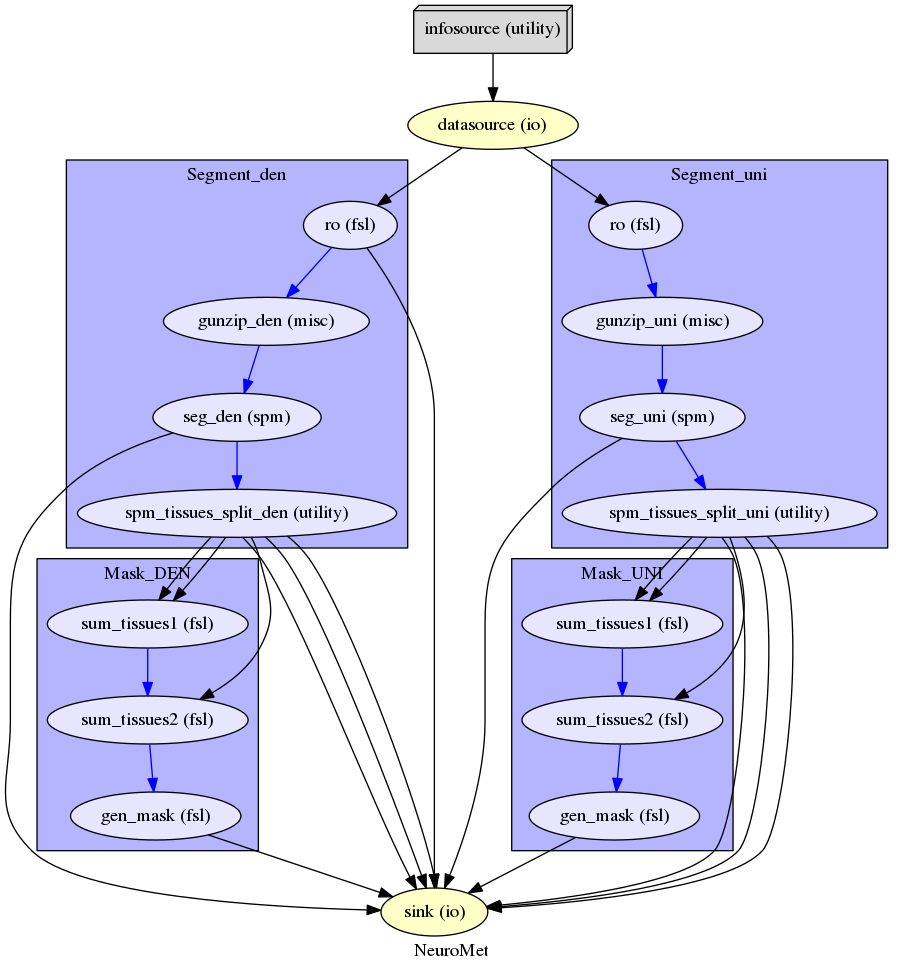

In [53]:
neuromet.write_graph(graph2use = 'colored', dotfilename = './neuromet_1st_part')
Image(filename='neuromet_1st_part.png')

## 4. Run Pipeline

In [ ]:
%%time
neuromet.run('MultiProc', plugin_args={'n_procs': cores})

200609-18:13:56,568 nipype.workflow INFO:
	 Workflow NeuroMet settings: ['check', 'execution', 'logging', 'monitoring']
200609-18:13:56,859 nipype.workflow INFO:
	 Running in parallel.
200609-18:13:56,872 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 48 jobs ready. Free memory (GB): 28.15/28.15, Free processors: 6/6.
200609-18:13:56,930 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMet.datasource" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/_subject_id_062/datasource".200609-18:13:56,932 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMet.datasource" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/_subject_id_059/datasource".200609-18:13:56,930 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMet.datasource" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/_subject_id_061/datasource".200609-18:13:56,932 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMet.datasource" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/_subject_id_060/datasource".



200609-18:13:56,930 nipype.workflow INFO:
	 [Node] Set

	 [Node] Setting-up "NeuroMet.Segment_den.gunzip_den" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_den/_subject_id_066/gunzip_den".200609-18:14:04,977 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMet.Segment_uni.gunzip_uni" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_uni/_subject_id_062/gunzip_uni".

200609-18:14:04,977 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMet.Segment_uni.gunzip_uni" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_uni/_subject_id_066/gunzip_uni".200609-18:14:04,977 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMet.Segment_den.gunzip_den" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_den/_subject_id_062/gunzip_den".

200609-18:14:04,980 nipype.workflow INFO:
	 [Node] Running "gunzip_uni" ("nipype.algorithms.misc.Gunzip")200609-18:14:04,978 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMet.Segment_den.gunzip_den" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_den/_subject_id_061/gunzip_den".200609-18:14:04,981 nipype.workflow INFO:
	 [Nod

	 [Node] Finished "NeuroMet.Segment_uni.seg_uni".
200609-18:17:36,225 nipype.workflow INFO:
	 [Node] Finished "NeuroMet.Mask_UNI.sum_tissues1".
200609-18:17:37,95 nipype.workflow INFO:
	 [Job 19] Completed (NeuroMet.Segment_uni.seg_uni).
200609-18:17:37,96 nipype.workflow INFO:
	 [Job 5] Completed (NeuroMet.Mask_UNI.sum_tissues1).
200609-18:17:37,99 nipype.workflow INFO:
	 [Job 36] Completed (NeuroMet.Segment_uni.spm_tissues_split_uni).
200609-18:17:37,104 nipype.workflow INFO:
	 [MultiProc] Running 3 tasks, and 51 jobs ready. Free memory (GB): 27.55/28.15, Free processors: 3/6.
                     Currently running:
                       * NeuroMet.Segment_den.seg_den
                       * NeuroMet.Segment_den.seg_den
                       * NeuroMet.Segment_den.seg_den
200609-18:17:37,155 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMet.Mask_UNI.sum_tissues2" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/Mask_UNI/_subject_id_066/sum_tissues2".
200609-18:17:37,156 nipype.workflow 

fslmaths /home/WorkFlowTemp/NeuroMet/NeuroMet/Mask_UNI/_subject_id_062/sum_tissues1/c1NeuroMet062.UNI_mp2rage_orig_reoriented_maths.nii.gz  -add /home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_uni/_subject_id_062/seg_uni/c3NeuroMet062.UNI_mp2rage_orig_reoriented.nii /home/WorkFlowTemp/NeuroMet/NeuroMet/Mask_UNI/_subject_id_062/sum_tissues2/c1NeuroMet062.UNI_mp2rage_orig_reoriented_maths_maths.nii.gz

200609-18:17:41,189 nipype.workflow INFO:
	 [Node] Running "ro" ("nipype.interfaces.fsl.utils.Reorient2Std"), a CommandLine Interface with command:
fslreorient2std /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/NeuroMet060/NeuroMet060.UNI_mp2rage_orig.nii.gz /home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_uni/_subject_id_060/ro/NeuroMet060.UNI_mp2rage_orig_reoriented.nii.gz

200609-18:17:41,208 nipype.workflow INFO:
	 [Node] Finished "NeuroMet.Segment_den.spm_tissues_split_den".
200609-18:17:42,164 nipype.workflow INFO:
	 [Node] Finished "NeuroMet.Mask_UNI.gen_mask"

200609-18:17:49,118 nipype.workflow INFO:
	 [Job 30] Completed (NeuroMet.Mask_DEN.gen_mask).
200609-18:17:49,127 nipype.workflow INFO:
	 [MultiProc] Running 3 tasks, and 48 jobs ready. Free memory (GB): 27.55/28.15, Free processors: 3/6.
                     Currently running:
                       * NeuroMet.Segment_uni.seg_uni
                       * NeuroMet.Segment_den.seg_den
                       * NeuroMet.Segment_den.seg_den
200609-18:17:49,182 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMet.Segment_uni.gunzip_uni" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_uni/_subject_id_059/gunzip_uni".
200609-18:17:49,182 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMet.Segment_den.gunzip_den" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_den/_subject_id_060/gunzip_den".200609-18:17:49,181 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMet.sink" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/_subject_id_062/sink".

200609-18:17:49,207 nipype.workflow INFO:
	 [Node] Running "gu

	 [Node] Finished "NeuroMet.Mask_DEN.sum_tissues1".
200609-18:17:55,116 nipype.workflow INFO:
	 [Job 31] Completed (NeuroMet.sink).
200609-18:17:55,120 nipype.workflow INFO:
	 [Job 12] Completed (NeuroMet.Mask_DEN.sum_tissues1).
200609-18:17:55,127 nipype.workflow INFO:
	 [MultiProc] Running 4 tasks, and 46 jobs ready. Free memory (GB): 27.35/28.15, Free processors: 2/6.
                     Currently running:
                       * NeuroMet.Segment_uni.seg_uni
                       * NeuroMet.Segment_den.seg_den
                       * NeuroMet.Segment_uni.seg_uni
                       * NeuroMet.Segment_den.seg_den
200609-18:17:55,184 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMet.Mask_DEN.sum_tissues2" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/Mask_DEN/_subject_id_066/sum_tissues2".200609-18:17:55,185 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMet.Segment_den.ro" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_den/_subject_id_059/ro".

200609-18:17:55,208 nipype.workf

	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/_subject_id_066/c2NeuroMet066.UNI_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/NeuroMet066/c2NeuroMet066.UNI_mp2rage_orig_reoriented.nii
200609-18:18:02,182 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/_subject_id_066/c3NeuroMet066.UNI_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/NeuroMet066/c3NeuroMet066.UNI_mp2rage_orig_reoriented.nii
200609-18:18:02,417 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/_subject_id_066/mNeuroMet066.UNI_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/NeuroMet066/mNeuroMet066.UNI_mp2rage_orig_reoriented.nii
200609-18:18:03,124 nipype.workflow INFO:
	 [Job 43] Completed (

	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/_subject_id_061/c3NeuroMet061.DEN_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/NeuroMet061/c3NeuroMet061.DEN_mp2rage_orig_reoriented.nii
200609-18:18:10,742 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/_subject_id_061/mNeuroMet061.DEN_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/NeuroMet061/mNeuroMet061.DEN_mp2rage_orig_reoriented.nii
200609-18:18:11,141 nipype.workflow INFO:
	 [Job 81] Completed (NeuroMet.Segment_uni.ro).
200609-18:18:11,146 nipype.workflow INFO:
	 [MultiProc] Running 5 tasks, and 44 jobs ready. Free memory (GB): 27.15/28.15, Free processors: 1/6.
                     Currently running:
                       * NeuroMet.sink
                       * NeuroMet.Segment_den.seg_den
                       

200609-18:21:15,427 nipype.workflow INFO:
	 [Node] Finished "NeuroMet.Segment_uni.seg_uni".
200609-18:21:17,313 nipype.workflow INFO:
	 [Job 51] Completed (NeuroMet.Segment_uni.seg_uni).
200609-18:21:17,329 nipype.workflow INFO:
	 [MultiProc] Running 5 tasks, and 43 jobs ready. Free memory (GB): 27.15/28.15, Free processors: 1/6.
                     Currently running:
                       * NeuroMet.Segment_den.seg_den
                       * NeuroMet.Segment_uni.seg_uni
                       * NeuroMet.Segment_den.seg_den
                       * NeuroMet.Segment_uni.seg_uni
                       * NeuroMet.Segment_den.seg_den
200609-18:21:17,400 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMet.Segment_uni.spm_tissues_split_uni" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_uni/_subject_id_060/spm_tissues_split_uni".
200609-18:21:17,426 nipype.workflow INFO:
	 [Node] Running "spm_tissues_split_uni" ("nipype.interfaces.utility.wrappers.Function")
200609-18:21:17,444 nipype.

200609-18:21:29,414 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMet.Mask_UNI.sum_tissues1" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/Mask_UNI/_subject_id_059/sum_tissues1".
200609-18:21:29,441 nipype.workflow INFO:
	 [Node] Running "sum_tissues1" ("nipype.interfaces.fsl.maths.MultiImageMaths"), a CommandLine Interface with command:
fslmaths /home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_uni/_subject_id_059/seg_uni/c1NeuroMet059.UNI_mp2rage_orig_reoriented.nii  -add /home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_uni/_subject_id_059/seg_uni/c2NeuroMet059.UNI_mp2rage_orig_reoriented.nii /home/WorkFlowTemp/NeuroMet/NeuroMet/Mask_UNI/_subject_id_059/sum_tissues1/c1NeuroMet059.UNI_mp2rage_orig_reoriented_maths.nii.gz
200609-18:21:30,516 nipype.workflow INFO:
	 [Node] Finished "NeuroMet.Mask_UNI.sum_tissues1".
200609-18:21:31,53 nipype.workflow INFO:
	 [Node] Finished "NeuroMet.Segment_uni.ro".
200609-18:21:31,324 nipype.workflow INFO:
	 [Job 97] Completed (NeuroMet.Segment_uni.ro).
200609-18:

	 [Node] Finished "NeuroMet.Mask_DEN.sum_tissues2".
200609-18:21:39,332 nipype.workflow INFO:
	 [Job 61] Completed (NeuroMet.Mask_DEN.sum_tissues2).
200609-18:21:39,335 nipype.workflow INFO:
	 [MultiProc] Running 5 tasks, and 42 jobs ready. Free memory (GB): 27.15/28.15, Free processors: 1/6.
                     Currently running:
                       * NeuroMet.Segment_den.ro
                       * NeuroMet.Segment_uni.seg_uni
                       * NeuroMet.Segment_den.seg_den
                       * NeuroMet.Segment_uni.seg_uni
                       * NeuroMet.Segment_den.seg_den
200609-18:21:39,403 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMet.Mask_DEN.gen_mask" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/Mask_DEN/_subject_id_060/gen_mask".
200609-18:21:39,432 nipype.workflow INFO:
	 [Node] Running "gen_mask" ("nipype.interfaces.fsl.maths.UnaryMaths"), a CommandLine Interface with command:
fslmaths /home/WorkFlowTemp/NeuroMet/NeuroMet/Mask_DEN/_subject_id_060/sum_tissue

200609-18:21:47,340 nipype.workflow INFO:
	 [Job 84] Completed (NeuroMet.Segment_uni.spm_tissues_split_uni).
200609-18:21:47,348 nipype.workflow INFO:
	 [MultiProc] Running 4 tasks, and 42 jobs ready. Free memory (GB): 27.35/28.15, Free processors: 2/6.
                     Currently running:
                       * NeuroMet.Segment_den.seg_den
                       * NeuroMet.Segment_uni.seg_uni
                       * NeuroMet.Segment_den.seg_den
                       * NeuroMet.Segment_den.seg_den
200609-18:21:47,402 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMet.Mask_UNI.sum_tissues1" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/Mask_UNI/_subject_id_058/sum_tissues1".
200609-18:21:47,418 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMet.datasource" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/_subject_id_052/datasource".
200609-18:21:47,431 nipype.workflow INFO:
	 [Node] Running "sum_tissues1" ("nipype.interfaces.fsl.maths.MultiImageMaths"), a CommandLine Interface with command:

200609-18:21:57,436 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMet.Mask_DEN.sum_tissues1" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/Mask_DEN/_subject_id_059/sum_tissues1".
200609-18:21:57,459 nipype.workflow INFO:
	 [Node] Running "sum_tissues1" ("nipype.interfaces.fsl.maths.MultiImageMaths"), a CommandLine Interface with command:
fslmaths /home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_den/_subject_id_059/seg_den/c1NeuroMet059.DEN_mp2rage_orig_reoriented.nii  -add /home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_den/_subject_id_059/seg_den/c2NeuroMet059.DEN_mp2rage_orig_reoriented.nii /home/WorkFlowTemp/NeuroMet/NeuroMet/Mask_DEN/_subject_id_059/sum_tissues1/c1NeuroMet059.DEN_mp2rage_orig_reoriented_maths.nii.gz
200609-18:21:58,344 nipype.workflow INFO:
	 [Node] Finished "NeuroMet.Segment_den.ro".
200609-18:21:58,802 nipype.workflow INFO:
	 [Node] Finished "NeuroMet.Mask_DEN.sum_tissues1".
200609-18:21:59,350 nipype.workflow INFO:
	 [Job 120] Completed (NeuroMet.Segment_den.ro).
200609-1

	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/_subject_id_059/c1NeuroMet059.UNI_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/NeuroMet059/c1NeuroMet059.UNI_mp2rage_orig_reoriented.nii
200609-18:22:06,287 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/_subject_id_059/c2NeuroMet059.UNI_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/NeuroMet059/c2NeuroMet059.UNI_mp2rage_orig_reoriented.nii
200609-18:22:06,600 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/_subject_id_059/c3NeuroMet059.UNI_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/NeuroMet059/c3NeuroMet059.UNI_mp2rage_orig_reoriented.nii
200609-18:22:06,847 nipype.interface INFO:
	 sub: /media/drive

	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/_subject_id_058/c2NeuroMet058.DEN_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/NeuroMet058/c2NeuroMet058.DEN_mp2rage_orig_reoriented.nii
200609-18:22:14,836 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/_subject_id_058/c3NeuroMet058.DEN_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/NeuroMet058/c3NeuroMet058.DEN_mp2rage_orig_reoriented.nii
200609-18:22:15,90 nipype.workflow INFO:
	 [Node] Finished "NeuroMet.Segment_uni.ro".
200609-18:22:15,125 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/_subject_id_058/mNeuroMet058.DEN_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/NeuroMet058/mNeuroMet058.DEN_mp2rag

	 [Node] Running "seg_den" ("nipype.interfaces.spm.preprocess.NewSegment")
200609-18:22:29,378 nipype.workflow INFO:
	 [MultiProc] Running 6 tasks, and 39 jobs ready. Free memory (GB): 26.95/28.15, Free processors: 0/6.
                     Currently running:
                       * NeuroMet.Segment_den.seg_den
                       * NeuroMet.Segment_uni.seg_uni
                       * NeuroMet.Segment_den.seg_den
                       * NeuroMet.Segment_uni.seg_uni
                       * NeuroMet.Segment_den.seg_den
                       * NeuroMet.Segment_uni.seg_uni
200609-18:24:48,667 nipype.workflow INFO:
	 [Node] Finished "NeuroMet.Segment_uni.seg_uni".
200609-18:24:49,514 nipype.workflow INFO:
	 [Job 99] Completed (NeuroMet.Segment_uni.seg_uni).
200609-18:24:49,523 nipype.workflow INFO:
	 [MultiProc] Running 5 tasks, and 40 jobs ready. Free memory (GB): 27.15/28.15, Free processors: 1/6.
                     Currently running:
                       * NeuroMet.Segment_de

	 [Node] Finished "NeuroMet.Segment_uni.ro".
200609-18:25:03,526 nipype.workflow INFO:
	 [Job 145] Completed (NeuroMet.Segment_uni.ro).
200609-18:25:03,538 nipype.workflow INFO:
	 [MultiProc] Running 5 tasks, and 40 jobs ready. Free memory (GB): 27.15/28.15, Free processors: 1/6.
                     Currently running:
                       * NeuroMet.Segment_den.seg_den
                       * NeuroMet.Segment_uni.seg_uni
                       * NeuroMet.Segment_den.seg_den
                       * NeuroMet.Segment_uni.seg_uni
                       * NeuroMet.Segment_den.seg_den
200609-18:25:03,595 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMet.Segment_uni.gunzip_uni" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_uni/_subject_id_047/gunzip_uni".
200609-18:25:03,606 nipype.workflow INFO:
	 [Node] Running "gunzip_uni" ("nipype.algorithms.misc.Gunzip")
200609-18:25:03,997 nipype.workflow INFO:
	 [Node] Finished "NeuroMet.Segment_uni.gunzip_uni".
200609-18:25:05,528 nipype.wor

fslmaths /home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_den/_subject_id_054/seg_den/c1NeuroMet054.DEN_mp2rage_orig_reoriented.nii  -add /home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_den/_subject_id_054/seg_den/c2NeuroMet054.DEN_mp2rage_orig_reoriented.nii /home/WorkFlowTemp/NeuroMet/NeuroMet/Mask_DEN/_subject_id_054/sum_tissues1/c1NeuroMet054.DEN_mp2rage_orig_reoriented_maths.nii.gz

200609-18:25:24,992 nipype.workflow INFO:
	 [Node] Finished "NeuroMet.Mask_UNI.gen_mask".
200609-18:25:25,219 nipype.workflow INFO:
	 [Node] Finished "NeuroMet.Mask_DEN.sum_tissues1".
200609-18:25:25,547 nipype.workflow INFO:
	 [Job 108] Completed (NeuroMet.Mask_DEN.sum_tissues1).
200609-18:25:25,550 nipype.workflow INFO:
	 [Job 119] Completed (NeuroMet.Mask_UNI.gen_mask).
200609-18:25:25,554 nipype.workflow INFO:
	 [MultiProc] Running 4 tasks, and 40 jobs ready. Free memory (GB): 27.35/28.15, Free processors: 2/6.
                     Currently running:
                       * NeuroMet.Segment_uni.seg_uni
 

	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/_subject_id_054/c2NeuroMet054.UNI_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/NeuroMet054/c2NeuroMet054.UNI_mp2rage_orig_reoriented.nii
200609-18:25:33,310 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/_subject_id_054/c3NeuroMet054.UNI_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/NeuroMet054/c3NeuroMet054.UNI_mp2rage_orig_reoriented.nii
200609-18:25:33,554 nipype.workflow INFO:
	 [Job 153] Completed (NeuroMet.Segment_den.gunzip_den).
200609-18:25:33,564 nipype.workflow INFO:
	 [MultiProc] Running 5 tasks, and 39 jobs ready. Free memory (GB): 27.15/28.15, Free processors: 1/6.
                     Currently running:
                       * NeuroMet.sink
                       * NeuroMet.Segment_uni.seg_uni
            

200609-18:25:51,579 nipype.workflow INFO:
	 [MultiProc] Running 5 tasks, and 39 jobs ready. Free memory (GB): 27.15/28.15, Free processors: 1/6.
                     Currently running:
                       * NeuroMet.Segment_uni.seg_uni
                       * NeuroMet.Segment_den.seg_den
                       * NeuroMet.Segment_uni.seg_uni
                       * NeuroMet.Segment_den.seg_den
                       * NeuroMet.Segment_uni.seg_uni
200609-18:25:51,641 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMet.Mask_DEN.sum_tissues1" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/Mask_DEN/_subject_id_052/sum_tissues1".
200609-18:25:51,689 nipype.workflow INFO:
	 [Node] Running "sum_tissues1" ("nipype.interfaces.fsl.maths.MultiImageMaths"), a CommandLine Interface with command:
fslmaths /home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_den/_subject_id_052/seg_den/c1NeuroMet052.DEN_mp2rage_orig_reoriented.nii  -add /home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_den/_subject_id_052/seg_den/c

	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/_subject_id_052/c3NeuroMet052.UNI_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/NeuroMet052/c3NeuroMet052.UNI_mp2rage_orig_reoriented.nii
200609-18:26:00,915 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/_subject_id_052/mNeuroMet052.UNI_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/NeuroMet052/mNeuroMet052.UNI_mp2rage_orig_reoriented.nii
200609-18:26:01,581 nipype.workflow INFO:
	 [Job 131] Completed (NeuroMet.Segment_uni.seg_uni).
200609-18:26:01,596 nipype.workflow INFO:
	 [MultiProc] Running 5 tasks, and 39 jobs ready. Free memory (GB): 27.15/28.15, Free processors: 1/6.
                     Currently running:
                       * NeuroMet.sink
                       * NeuroMet.Segment_uni.seg_uni
                 

200609-18:26:11,651 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMet.Segment_den.seg_den" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_den/_subject_id_042/seg_den".
200609-18:26:11,653 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMet.Segment_uni.ro" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_uni/_subject_id_041/ro".
200609-18:26:11,678 nipype.workflow INFO:
	 [Node] Running "seg_den" ("nipype.interfaces.spm.preprocess.NewSegment")
200609-18:26:11,683 nipype.workflow INFO:
	 [Node] Running "ro" ("nipype.interfaces.fsl.utils.Reorient2Std"), a CommandLine Interface with command:
fslreorient2std /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/NeuroMet041/NeuroMet041.UNI_mp2rage_orig.nii.gz /home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_uni/_subject_id_041/ro/NeuroMet041.UNI_mp2rage_orig_reoriented.nii.gz
200609-18:26:13,594 nipype.workflow INFO:
	 [MultiProc] Running 6 tasks, and 37 jobs ready. Free memory (GB): 26.95/28.15, Free processors: 0/6.


200609-18:26:27,689 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMet.sink" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/_subject_id_051/sink".
200609-18:26:27,722 nipype.workflow INFO:
	 [Node] Running "sink" ("nipype.interfaces.io.DataSink")
200609-18:26:27,733 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/_subject_id_051/NeuroMet051.DEN_mp2rage_orig_reoriented.nii.gz -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/NeuroMet051/NeuroMet051.DEN_mp2rage_orig_reoriented.nii.gz
200609-18:26:28,630 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/_subject_id_051/c1NeuroMet051.DEN_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/NeuroMet051/c1NeuroMet051.DEN_mp2rage_orig_reoriented.nii
200609-18:26:28,930 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET

200609-18:28:35,161 nipype.workflow INFO:
	 [Node] Finished "NeuroMet.Segment_uni.seg_uni".
200609-18:28:35,729 nipype.workflow INFO:
	 [Job 147] Completed (NeuroMet.Segment_uni.seg_uni).
200609-18:28:35,739 nipype.workflow INFO:
	 [MultiProc] Running 5 tasks, and 37 jobs ready. Free memory (GB): 27.15/28.15, Free processors: 1/6.
                     Currently running:
                       * NeuroMet.Segment_den.seg_den
                       * NeuroMet.Segment_uni.seg_uni
                       * NeuroMet.Segment_den.seg_den
                       * NeuroMet.Segment_uni.seg_uni
                       * NeuroMet.Segment_den.seg_den
200609-18:28:35,803 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMet.Segment_uni.spm_tissues_split_uni" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_uni/_subject_id_047/spm_tissues_split_uni".
200609-18:28:35,815 nipype.workflow INFO:
	 [Node] Running "spm_tissues_split_uni" ("nipype.interfaces.utility.wrappers.Function")
200609-18:28:35,828 nipype

200609-18:28:53,815 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMet.Segment_uni.gunzip_uni" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_uni/_subject_id_039/gunzip_uni".
200609-18:28:53,842 nipype.workflow INFO:
	 [Node] Running "gunzip_uni" ("nipype.algorithms.misc.Gunzip")
200609-18:28:54,229 nipype.workflow INFO:
	 [Node] Finished "NeuroMet.Segment_uni.gunzip_uni".
200609-18:28:55,746 nipype.workflow INFO:
	 [Job 194] Completed (NeuroMet.Segment_uni.gunzip_uni).
200609-18:28:55,754 nipype.workflow INFO:
	 [MultiProc] Running 5 tasks, and 37 jobs ready. Free memory (GB): 27.15/28.15, Free processors: 1/6.
                     Currently running:
                       * NeuroMet.Segment_den.seg_den
                       * NeuroMet.Segment_uni.seg_uni
                       * NeuroMet.Segment_den.seg_den
                       * NeuroMet.Segment_uni.seg_uni
                       * NeuroMet.Segment_den.seg_den
200609-18:28:55,818 nipype.workflow INFO:
	 [Node] Setting-up "Neur

	 [Node] Setting-up "NeuroMet.Segment_den.ro" in "/home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_den/_subject_id_039/ro".

200609-18:29:15,846 nipype.workflow INFO:
	 [Node] Running "sum_tissues1" ("nipype.interfaces.fsl.maths.MultiImageMaths"), a CommandLine Interface with command:
fslmaths /home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_den/_subject_id_047/seg_den/c1NeuroMet047.DEN_mp2rage_orig_reoriented.nii  -add /home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_den/_subject_id_047/seg_den/c2NeuroMet047.DEN_mp2rage_orig_reoriented.nii /home/WorkFlowTemp/NeuroMet/NeuroMet/Mask_DEN/_subject_id_047/sum_tissues1/c1NeuroMet047.DEN_mp2rage_orig_reoriented_maths.nii.gz
200609-18:29:15,847 nipype.workflow INFO:
	 [Node] Running "ro" ("nipype.interfaces.fsl.utils.Reorient2Std"), a CommandLine Interface with command:
fslreorient2std /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/NeuroMet039/NeuroMet039.DEN_mp2rage_orig.nii.gz /home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_d

	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/_subject_id_047/c3NeuroMet047.UNI_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/NeuroMet047/c3NeuroMet047.UNI_mp2rage_orig_reoriented.nii
200609-18:29:25,293 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/_subject_id_047/mNeuroMet047.UNI_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/NeuroMet047/mNeuroMet047.UNI_mp2rage_orig_reoriented.nii
200609-18:29:25,770 nipype.workflow INFO:
	 [Job 201] Completed (NeuroMet.Segment_den.gunzip_den).
200609-18:29:25,774 nipype.workflow INFO:
	 [MultiProc] Running 5 tasks, and 36 jobs ready. Free memory (GB): 27.15/28.15, Free processors: 1/6.
                     Currently running:
                       * NeuroMet.sink
                       * NeuroMet.Segment_uni.seg_uni
              

fslmaths /home/WorkFlowTemp/NeuroMet/NeuroMet/Mask_UNI/_subject_id_041/sum_tissues1/c1NeuroMet041.UNI_mp2rage_orig_reoriented_maths.nii.gz  -add /home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_uni/_subject_id_041/seg_uni/c3NeuroMet041.UNI_mp2rage_orig_reoriented.nii /home/WorkFlowTemp/NeuroMet/NeuroMet/Mask_UNI/_subject_id_041/sum_tissues2/c1NeuroMet041.UNI_mp2rage_orig_reoriented_maths_maths.nii.gz
200609-18:29:55,248 nipype.workflow INFO:
	 [Node] Finished "NeuroMet.Mask_UNI.sum_tissues2".
200609-18:29:55,797 nipype.workflow INFO:
	 [Job 182] Completed (NeuroMet.Mask_UNI.sum_tissues2).
200609-18:29:55,801 nipype.workflow INFO:
	 [MultiProc] Running 4 tasks, and 36 jobs ready. Free memory (GB): 27.35/28.15, Free processors: 2/6.
                     Currently running:
                       * NeuroMet.Segment_den.seg_den
                       * NeuroMet.Segment_uni.seg_uni
                       * NeuroMet.Segment_den.seg_den
                       * NeuroMet.Segment_den.seg_den
200609-

fslmaths /home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_den/_subject_id_042/seg_den/c1NeuroMet042.DEN_mp2rage_orig_reoriented.nii  -add /home/WorkFlowTemp/NeuroMet/NeuroMet/Segment_den/_subject_id_042/seg_den/c2NeuroMet042.DEN_mp2rage_orig_reoriented.nii /home/WorkFlowTemp/NeuroMet/NeuroMet/Mask_DEN/_subject_id_042/sum_tissues1/c1NeuroMet042.DEN_mp2rage_orig_reoriented_maths.nii.gz
200609-18:30:17,95 nipype.workflow INFO:
	 [Node] Finished "NeuroMet.Mask_DEN.sum_tissues1".
200609-18:30:17,816 nipype.workflow INFO:
	 [Job 172] Completed (NeuroMet.Mask_DEN.sum_tissues1).
200609-18:30:17,820 nipype.workflow INFO:
	 [MultiProc] Running 4 tasks, and 35 jobs ready. Free memory (GB): 27.35/28.15, Free processors: 2/6.
                     Currently running:
                       * NeuroMet.sink
                       * NeuroMet.Segment_den.seg_den
                       * NeuroMet.Segment_uni.seg_uni
                       * NeuroMet.Segment_den.seg_den
200609-18:30:17,871 nipype.workflow INFO

	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/_subject_id_042/c3NeuroMet042.UNI_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/NeuroMet042/c3NeuroMet042.UNI_mp2rage_orig_reoriented.nii
200609-18:30:25,624 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/_subject_id_042/mNeuroMet042.UNI_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis_fs7/NeuroMet042/mNeuroMet042.UNI_mp2rage_orig_reoriented.nii


# Workflow 2. Part - Create combined image and Freesurfer

## 05. Print current Subjects 

In [ ]:
print(subject_list)

## 06.Edit Subjects list 

**Subject List**:
* to analyze all subjects cut&paste below: `subject_list = [ x.split('/')[-1][8:11] for x in uni ]` already existing analyses will _NOT_ be run again neither overwritten
* to analyse only some subjects cut&paste below something with the format: `subject_list = ['subject number', 'subject number' ... ]` i.e.: `subject_list = ['001']` or `subject_list = ['001', '003']
* leave the next cell commented to mantain the actual list

In [ ]:
# Uncomment here for all subjects:
#subject_list = [ x.split('/')[-1][8:11] for x in uni ]

# only some subjects? Then edit here:  
#subject_list = ['001', '002'] # format: ['subid1', 'subid2', ....]

## Check if all the brain masks are present and gzipped

In [ ]:
#neuromet_creator.check_gz_masks(subject_list)


## SetUp Workflow
Just run this cell to setup the Workflow - nothing to edit

In [ ]:
neuromet_creator = NeuroMet(subject_list, temp_dir, w_dir, omp_nthreads, raw_data_dir, overwrite, spm_path, matlab_command, fsl_file_format, qdec_subjects, qdec_subfolder)
neuromet2 = neuromet_creator.make_neuromet2_workflow()

## Draw Workflow's Graph
Run this cell to draw the workflow's graph

200609-18:02:04,769 nipype.workflow INFO:
	 Generated workflow graph: ./neuromet_2.png (graph2use=colored, simple_form=True).


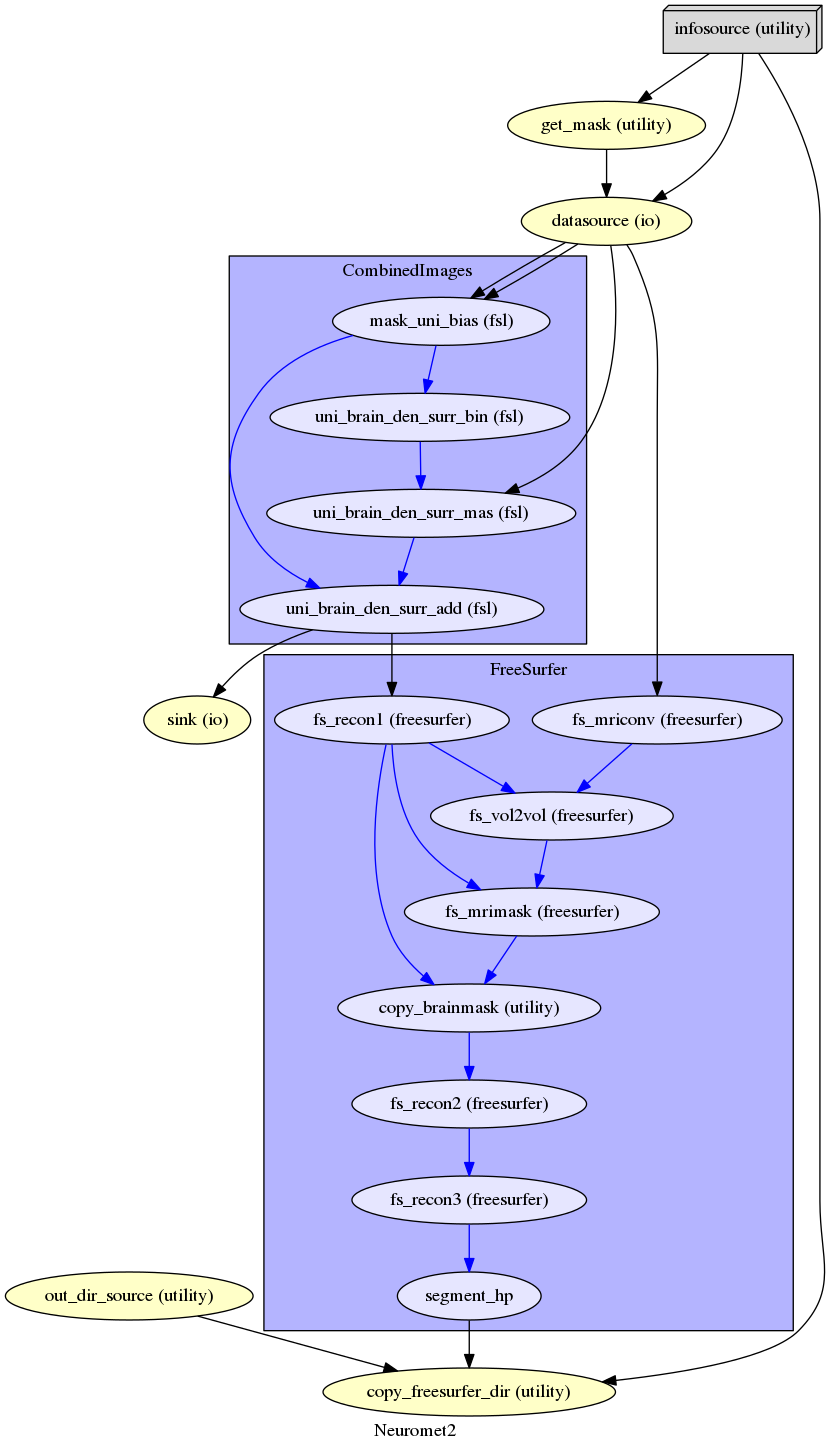

In [12]:
neuromet2.write_graph(graph2use = 'colored', dotfilename = './neuromet_2')
Image(filename='neuromet_2.png')

## Run Freesurfer Analysis
run the cell below to run the analysis

In [13]:
%%time
neuromet2.run('MultiProc', plugin_args={'n_procs': cores})

200609-18:02:07,625 nipype.workflow INFO:
	 Workflow Neuromet2 settings: ['check', 'execution', 'logging', 'monitoring']
200609-18:02:07,638 nipype.workflow INFO:
	 Running in parallel.
200609-18:02:07,641 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 28.15/28.15, Free processors: 6/6.
200609-18:02:07,689 nipype.workflow INFO:
	 [Job 0] Cached (Neuromet2.get_mask).
200609-18:02:09,695 nipype.workflow INFO:
	 [Node] Setting-up "Neuromet2.datasource" in "/home/WorkFlowTemp/NeuroMet/Neuromet2/_subject_id_001/datasource".
200609-18:02:09,740 nipype.workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")
200609-18:02:09,772 nipype.workflow INFO:
	 [Node] Finished "Neuromet2.datasource".
200609-18:02:11,644 nipype.workflow INFO:
	 [Job 1] Completed (Neuromet2.datasource).
200609-18:02:11,647 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 2 jobs ready. Free memory (GB): 28.15/28.15, Free processors: 6/6.
200609-18:

Process Process-6:
Process Process-2:
Process Process-5:
Process Process-3:
Process Process-1:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
TypeError: __init__() got an unexpected keyword argument 'initializer'
  File "/opt/anaconda3/envs/neuromet_dev/lib/python3.6/site-packages/nipype/pipeline/plugins/multiproc.py", line 148, in __init__
    mp_context=mp_context,
  File "/opt/anaconda3/envs/neuromet_dev/lib/python3.6/site-packages/nipype/pipeline/plugins/multiproc.py", line 148, in __init__
    mp_context=mp_context,
TypeError: __init__() got an unexpected keyword argument 'initializer'
  File "/opt/anaconda3/envs/neuromet_dev/lib/python3.6/site-packages/nipype/pipeline/plugins/multiproc.py", line 148, in __init__
    mp_context=mp_context,
TypeError: __init__() got an unexpected keyword argument 'initializer'

During handling of the above exception, another exception occurred:

Traceback (

KeyboardInterrupt: 

## 07. Qdec

In [ ]:
s = neuromet_creator.show_qdec_stuff()
print(s)

In [ ]:
%%bash -s "$w_dir"
SUBJECTS_DIR=$1
cd $SUBJECTS_DIR
qdec&

## 08. Extract Hippocampal volumes

In [ ]:
%%bash -s "$w_dir" "$subject_list"
SUBJECTS_DIR=$1
echo $FREESURFER_HOME
echo $SUBJECTS_DIR
subject_list=$2
cmd="/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/bash-scripts/HippocampalVolumeExtraction"
cd $SUBJECTS_DIR
$cmd ${subject_list//[\',\[\]]}

In [ ]:
import pandas as pd
out_file = '/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis'
df = pd.read_csv(out_file, sep = ' ')
writer = pd.ExcelWriter('HippocampusSubfieldVolume.xlsx')
df.to_excel(writer,'HippocampusSubfieldVolume')
writer.save()

In [ ]:
## Vergleich 2 Freesurfer Ordner

In [ ]:
b = [ i.split('/')[-1] for i in glob.glob('/media/drive_s/AG/AG-Floeel-Imaging/02-User/TheresaKoebe/NeuroMet_Project/Structural_analysis/NeuroMet027/NeuroMet027.freesurfer/*/*')] 

In [ ]:
a = [ i.split('/')[-1] for i in glob.glob('/media/drive_s/AG/AG-Floeel-Imaging/02-User/TheresaKoebe/NeuroMet_Project/Structural_analysis/NeuroMet026/NeuroMet026.freesurfer/*/*')] 

In [ ]:
a

In [ ]:
set(a) - set(b)

In [ ]:
c = [ i.split('/')[-1] for i in glob.glob('/media/drive_s/AG/AG-Floeel-Imaging/02-User/TheresaKoebe/NeuroMet_Project/Structural_analysis/NeuroMet028/NeuroMet028.freesurfer/*/*')] 

In [ ]:
set(a) - set(c)